In [1]:
#restart the kernel after installation
!pip install numpy pandas-profiling matplotlib seaborn --quiet

In [2]:
!pip install jovian opendatasets xgboost graphviz lightgbm scikit-learn xgboost lightgbm --upgrade --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.6/68.6 KB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 MB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.0/47.0 KB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 70.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 67.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [3]:
import os
import opendatasets as od
import pandas as pd
pd.set_option("display.max_columns", 120)
pd.set_option("display.max_rows", 120)

In [4]:
od.download('https://www.kaggle.com/c/rossmann-store-sales')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: rimoghosh
Your Kaggle Key: ··········


100%|██████████| 6.99M/6.99M [00:00<00:00, 26.9MB/s]



Extracting archive ./rossmann-store-sales/rossmann-store-sales.zip to ./rossmann-store-sales


In [5]:
os.listdir('rossmann-store-sales')

['store.csv', 'sample_submission.csv', 'train.csv', 'test.csv']

In [6]:
train_df=pd.read_csv('./rossmann-store-sales/train.csv')
test_df=pd.read_csv('./rossmann-store-sales/test.csv')
store_df=pd.read_csv('./rossmann-store-sales/store.csv')
submission_df=pd.read_csv('./rossmann-store-sales/sample_submission.csv')

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [7]:
train_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1


In [8]:
store_df

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [9]:
test_df

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0
...,...,...,...,...,...,...,...,...
41083,41084,1111,6,2015-08-01,1.0,0,0,0
41084,41085,1112,6,2015-08-01,1.0,0,0,0
41085,41086,1113,6,2015-08-01,1.0,0,0,0
41086,41087,1114,6,2015-08-01,1.0,0,0,0


In [10]:
test_df.nunique()

Id               41088
Store              856
DayOfWeek            7
Date                48
Open                 2
Promo                2
StateHoliday         2
SchoolHoliday        2
dtype: int64

In [11]:
merged_train_df=train_df.merge(store_df,how='left',on='Store')
merged_test_df=test_df.merge(store_df,how='left',on='Store')
merged_train_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [12]:
merged_test_df.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,1,4,2015-09-17,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,3,4,2015-09-17,1.0,1,0,0,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
2,3,7,4,2015-09-17,1.0,1,0,0,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
3,4,8,4,2015-09-17,1.0,1,0,0,a,a,7520.0,10.0,2014.0,0,NaN,NaN,NaN
4,5,9,4,2015-09-17,1.0,1,0,0,a,c,2030.0,8.0,2000.0,0,NaN,NaN,NaN


In [13]:
merged_train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 13  CompetitionO

In [14]:
merged_train_df.isna().sum()

Store                             0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance            2642
CompetitionOpenSinceMonth    323348
CompetitionOpenSinceYear     323348
Promo2                            0
Promo2SinceWeek              508031
Promo2SinceYear              508031
PromoInterval                508031
dtype: int64

In [15]:
merged_test_df.isna().sum()

Id                               0
Store                            0
DayOfWeek                        0
Date                             0
Open                            11
Promo                            0
StateHoliday                     0
SchoolHoliday                    0
StoreType                        0
Assortment                       0
CompetitionDistance             96
CompetitionOpenSinceMonth    15216
CompetitionOpenSinceYear     15216
Promo2                           0
Promo2SinceWeek              17232
Promo2SinceYear              17232
PromoInterval                17232
dtype: int64

# **Feature Engineering**

# Date

In [16]:
def split_date(df):
    df['Date'] = pd.to_datetime(df['Date'])
    df['Year'] = df.Date.dt.year
    df['Month'] = df.Date.dt.month
    df['Day'] = df.Date.dt.day
    df['WeekOfYear'] = df.Date.dt.isocalendar().week

In [17]:
split_date(merged_train_df)
split_date(merged_test_df)
merged_train_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day,WeekOfYear
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2015,7,31,31
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,7,31,31
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,7,31,31
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN,2015,7,31,31
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN,2015,7,31,31


In [18]:
merged_train_df[merged_train_df.Open==0].Sales.value_counts()

0    172817
Name: Sales, dtype: int64

In [19]:
merged_train_df=merged_train_df[merged_train_df.Open==1].copy()
merged_train_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day,WeekOfYear
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2015,7,31,31
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,7,31,31
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,7,31,31
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN,2015,7,31,31
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN,2015,7,31,31


# Competition

Next, we can use the columns `CompetitionOpenSince[Month/Year]` columns from `store_df` to compute the number of months for which a competitor has been open near the store.

In [20]:
merged_train_df[merged_train_df.CompetitionOpenSinceYear>merged_train_df.Year]

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day,WeekOfYear
236384,5,3,2014-12-31,1830,217,1,0,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN,2014,12,31,1
236466,103,3,2014-12-31,3691,392,1,0,0,1,d,c,5210.0,5.0,2015.0,0,NaN,NaN,NaN,2014,12,31,1
236489,131,3,2014-12-31,2490,305,1,0,0,1,c,a,920.0,7.0,2015.0,0,NaN,NaN,NaN,2014,12,31,1
236517,170,3,2014-12-31,3538,387,1,0,0,1,a,a,1070.0,5.0,2015.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2014,12,31,1
236528,185,3,2014-12-31,3635,335,1,0,0,1,d,c,1860.0,5.0,2015.0,0,NaN,NaN,NaN,2014,12,31,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016032,1053,3,2013-01-02,7750,962,1,0,0,1,a,a,1710.0,7.0,2015.0,0,NaN,NaN,NaN,2013,1,2,1
1016051,1072,3,2013-01-02,6443,680,1,0,0,1,a,c,5380.0,8.0,2015.0,1,5.0,2010.0,"Feb,May,Aug,Nov",2013,1,2,1
1016064,1085,3,2013-01-02,7323,791,1,0,0,1,c,a,4030.0,2.0,2015.0,0,NaN,NaN,NaN,2013,1,2,1
1016090,1111,3,2013-01-02,5097,505,1,0,0,1,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct",2013,1,2,1


In [21]:
def comp_months(df):
  df['CompetitionOpen']=12*(df.Year-df.CompetitionOpenSinceYear)+(df.Month-df.CompetitionOpenSinceMonth)
  df['CompetitionOpen']=df['CompetitionOpen'].map(lambda x:0 if x<0 else x).fillna(0)


In [22]:
comp_months(merged_train_df)
comp_months(merged_test_df)

In [23]:
merged_train_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day,WeekOfYear,CompetitionOpen
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2015,7,31,31,82.0
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,7,31,31,92.0
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,7,31,31,103.0
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN,2015,7,31,31,70.0
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN,2015,7,31,31,3.0


In [24]:
merged_train_df[['Date','CompetitionDistance','CompetitionOpen']].sample(10)

,Date,CompetitionDistance,CompetitionOpen
512508,2014-03-29,10850.0,0.0
830888,2013-06-17,15140.0,136.0
165299,2015-03-05,18640.0,18.0
819516,2013-06-27,8250.0,104.0
522565,2014-03-20,4650.0,0.0
966069,2013-02-15,31830.0,35.0
528228,2014-03-15,820.0,0.0
921049,2013-03-28,7860.0,88.0
838532,2013-06-10,6890.0,0.0
510264,2014-03-31,2240.0,10.0


In [25]:
def check_promo_month(row):
    month2str = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun',              
                 7:'Jul', 8:'Aug', 9:'Sept', 10:'Oct', 11:'Nov', 12:'Dec'}
    try:
        months = (row['PromoInterval'] or '').split(',')
        if row['Promo2Open'] and month2str[row['Month']] in months:
            return 1
        else:
            return 0
    except Exception:
        return 0

def promo_cols(df):
    # Months since Promo2 was open
    df['Promo2Open'] = 12 * (df.Year - df.Promo2SinceYear) +  (df.WeekOfYear - df.Promo2SinceWeek)*7/30.5
    df['Promo2Open'] = df['Promo2Open'].map(lambda x: 0 if x < 0 else x).fillna(0) * df['Promo2']
    # Whether a new round of promotions was started in the current month
    df['IsPromo2Month'] = df.apply(check_promo_month, axis=1) * df['Promo2']

In [26]:
promo_cols(merged_train_df)
promo_cols(merged_test_df)

In [27]:
merged_train_df[['Date', 'Promo2', 'Promo2SinceYear', 'Promo2SinceWeek', 'PromoInterval', 'Promo2Open', 'IsPromo2Month']].sample(20)

,Date,Promo2,Promo2SinceYear,Promo2SinceWeek,PromoInterval,Promo2Open,IsPromo2Month
611369,2013-12-30,1,2014.0,40.0,"Jan,Apr,Jul,Oct",0.000000,0
105258,2015-04-28,1,2009.0,37.0,"Jan,Apr,Jul,Oct",67.639344,1
1273,2015-07-30,0,NaN,NaN,NaN,0.000000,0
62160,2015-06-06,0,NaN,NaN,NaN,0.000000,0
126420,2015-04-09,0,NaN,NaN,NaN,0.000000,0
290499,2014-11-04,1,2010.0,13.0,"Jan,Apr,Jul,Oct",55.344262,0
687244,2013-10-23,0,NaN,NaN,NaN,0.000000,0
826019,2013-06-21,1,2013.0,31.0,"Jan,Apr,Jul,Oct",0.000000,0
205836,2015-01-28,1,2009.0,45.0,"Feb,May,Aug,Nov",62.819672,0
495232,2014-04-14,0,NaN,NaN,NaN,0.000000,0


In [28]:
merged_train_df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval', 'Year', 'Month', 'Day',
       'WeekOfYear', 'CompetitionOpen', 'Promo2Open', 'IsPromo2Month'],
      dtype='object')

In [29]:
input_cols = ['Store', 'DayOfWeek', 'Promo', 'StateHoliday', 'SchoolHoliday', 
              'StoreType', 'Assortment', 'CompetitionDistance', 'CompetitionOpen', 
              'Day', 'Month', 'Year', 'WeekOfYear',  'Promo2', 
              'Promo2Open', 'IsPromo2Month']
target_col = 'Sales'

In [30]:
inputs = merged_train_df[input_cols].copy()
targets = merged_train_df[target_col].copy()

In [31]:
test_inputs = merged_test_df[input_cols].copy()

In [32]:
numeric_cols = ['Store', 'Promo', 'SchoolHoliday', 
              'CompetitionDistance', 'CompetitionOpen', 'Promo2', 'Promo2Open', 'IsPromo2Month',
              'Day', 'Month', 'Year', 'WeekOfYear',  ]
categorical_cols = ['DayOfWeek', 'StateHoliday', 'StoreType', 'Assortment']

In [33]:
inputs[numeric_cols].isna().sum()

Store                     0
Promo                     0
SchoolHoliday             0
CompetitionDistance    2186
CompetitionOpen           0
Promo2                    0
Promo2Open                0
IsPromo2Month             0
Day                       0
Month                     0
Year                      0
WeekOfYear                0
dtype: int64

In [34]:
test_inputs[numeric_cols].isna().sum()

Store                   0
Promo                   0
SchoolHoliday           0
CompetitionDistance    96
CompetitionOpen         0
Promo2                  0
Promo2Open              0
IsPromo2Month           0
Day                     0
Month                   0
Year                    0
WeekOfYear              0
dtype: int64

In [35]:
max_distance = inputs.CompetitionDistance.max()

In [36]:
inputs['CompetitionDistance'].fillna(max_distance, inplace=True)
test_inputs['CompetitionDistance'].fillna(max_distance, inplace=True)

In [37]:
from sklearn.preprocessing import MinMaxScaler

In [38]:
scaler = MinMaxScaler().fit(inputs[numeric_cols])

In [39]:
inputs[numeric_cols] = scaler.transform(inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

In [40]:
from sklearn.preprocessing import OneHotEncoder

In [41]:
inputs['StateHoliday']=inputs['StateHoliday'].astype('string')

In [42]:
inputs.dtypes

Store                  float64
DayOfWeek                int64
Promo                  float64
StateHoliday            string
SchoolHoliday          float64
StoreType               object
Assortment              object
CompetitionDistance    float64
CompetitionOpen        float64
Day                    float64
Month                  float64
Year                   float64
WeekOfYear             float64
Promo2                 float64
Promo2Open             float64
IsPromo2Month          float64
dtype: object

In [43]:
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore').fit(inputs[categorical_cols])
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [44]:
inputs[encoded_cols] = encoder.transform(inputs[categorical_cols])
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])

In [45]:
inputs.shape

(844392, 34)

In [46]:
test_inputs.shape

(41088, 34)

In [47]:
X=inputs[numeric_cols+encoded_cols]
X_test=test_inputs[numeric_cols+ encoded_cols]
X.shape,X_test.shape

((844392, 30), (41088, 30))

## Gradient Boosting

We're now ready to train our gradient boosting machine (GBM) model. Here's how a GBM model works:

1. The average value of the target column and uses as an initial prediction every input.
2. The residuals (difference) of the predictions with the targets are computed.
3. A decision tree of limited depth is trained to **predict just the residuals** for each input.
4. Predictions from the decision tree are scaled using a parameter called the learning rate (this prevents overfitting)
5. Scaled predictions fro the tree are added to the previous predictions to obtain the new and improved predictions.
6. Steps 2 to 5 are repeated to create new decision trees, each of which is trained to predict just the residuals from the previous prediction.

The term "gradient" refers to the fact that each decision tree is trained with the purpose of reducing the loss from the previous iteration (similar to gradient descent). The term "boosting" refers the general technique of training new models to improve the results of an existing model. 

> **EXERCISE**: Can you describe in your own words how a gradient boosting machine is different from a random forest?


For a mathematical explanation of gradient boosting, check out the following resources:

- [XGBoost Documentation](https://xgboost.readthedocs.io/en/latest/tutorials/model.html)
- [Video Tutorials on StatQuest](https://www.youtube.com/watch?v=3CC4N4z3GJc&list=PLblh5JKOoLUJjeXUvUE0maghNuY2_5fY6)

Here's a visual representation of gradient boosting:

![](https://miro.medium.com/max/560/1*85QHtH-49U7ozPpmA5cAaw.png)



In [48]:
from xgboost import XGBRegressor

In [49]:
%%time
model=XGBRegressor(random_state=42,n_jobs=-1,n_estimators=20,max_depth=4)
model.fit(X,targets)

CPU times: user 35.9 s, sys: 151 ms, total: 36.1 s
Wall time: 18.9 s


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=20, n_jobs=-1, num_parallel_tree=None, predictor=None,
             random_state=42, ...)

In [50]:
preds=model.predict(X)

In [51]:
from sklearn.metrics import mean_squared_error

In [52]:
def rmse(a,b):
  return mean_squared_error(a,b,squared=False)

In [53]:
rmse(preds,targets)

2377.752008804669

In [54]:
import matplotlib.pyplot as plt
from xgboost import plot_tree
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=(15,10)

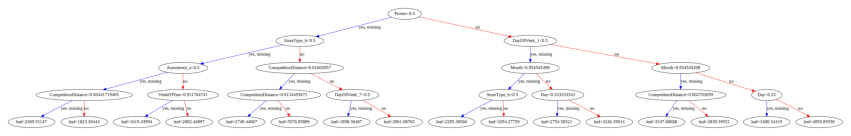

In [55]:
plot_tree(model,rankdir='TB')

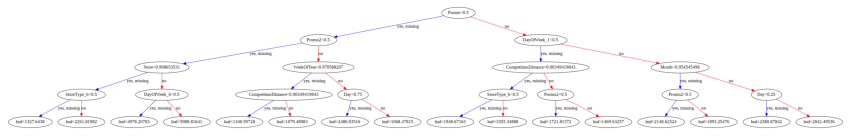

In [56]:
plot_tree(model,rankdir='TB',num_trees=1)

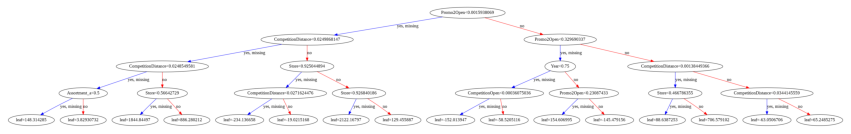

In [57]:
plot_tree(model,rankdir='TB',num_trees=19)

In [58]:
importance_df=pd.DataFrame({
    'Feature':X.columns,
    'Importance':model.feature_importances_
}).sort_values('Importance',ascending=False)
importance_df.head(10)

,Feature,Importance
1,Promo,0.317473
24,StoreType_b,0.086472
12,DayOfWeek_1,0.082268
5,Promo2,0.063986
3,CompetitionDistance,0.045053
29,Assortment_c,0.040226
27,Assortment_a,0.038759
9,Month,0.038493
0,Store,0.038119
8,Day,0.033209


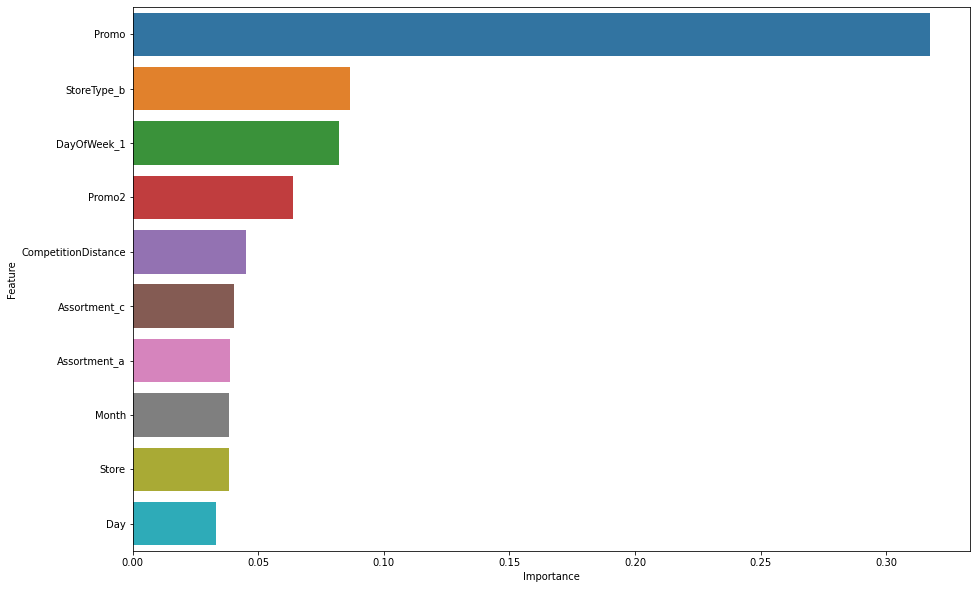

In [59]:
import seaborn as sns
sns.barplot(data=importance_df.head(10),x='Importance',y='Feature')

# K Fold Cross Validation

In [60]:
from sklearn.model_selection import KFold

In [61]:
def train_and_evaluate(X_train,train_targets,X_val,val_targets,**params):
   model=XGBRegressor(random_state=42,n_jobs=-1,**params)
   model.fit(X_train,train_targets)
   train_rmse=rmse(model.predict(X_train),train_targets)
   val_rmse=rmse(model.predict(X_val),val_targets)
   return model,train_rmse,val_rmse

In [62]:
kfolds=KFold(n_splits=5,shuffle=True)

In [63]:
models=[]
for train_idx,val_idx in kfolds.split(X):
  X_train,train_targets=X.iloc[train_idx],targets.iloc[train_idx]
  X_val,val_targets=X.iloc[val_idx],targets.iloc[val_idx]
  model,train_rmse,val_rmse=train_and_evaluate(X_train,train_targets,X_val,val_targets,
                                               max_depth=5,n_estimators=20)
  models.append(model)
  print("Train_rmse: {}, Val_rmse:{}".format(train_rmse,val_rmse))

Train_rmse: 2256.4969147999386, Val_rmse:2261.438263312687
Train_rmse: 2222.4359431861867, Val_rmse:2242.387031877962
Train_rmse: 2215.36126925358, Val_rmse:2205.060209778569
Train_rmse: 2287.2395319628013, Val_rmse:2273.916152165645
Train_rmse: 2217.889371490964, Val_rmse:2230.619054282512


In [64]:
import numpy as np
def predict_avg(models,inputs):
  return np.mean([model.predict(inputs) for model in models],axis=0)

In [65]:
preds=predict_avg(models,X)
len(preds),preds

(844392,
 array([7590.065, 7231.075, 8779.018, ..., 8059.268, 7949.577, 8982.721],
       dtype=float32))

In [66]:
def test_param_kfold(n_splits,**params):
  train_rmses,val_rmses,models=[],[],[]
  kfold=KFold(n_splits)
  for train_idx,val_idx in kfolds.split(X):
    X_train,train_targets=X.iloc[train_idx],targets.iloc[train_idx]
    X_val,val_targets=X.iloc[val_idx],targets.iloc[val_idx]
    model,train_rmse,val_rmse=train_and_evaluate(X_train,train_targets,X_val,val_targets,**params)
                                               
    models.append(model)
    train_rmses.append(train_rmse)
    val_rmses.append(val_rmse)
  print("Train_rmse: {}, Val_rmse:{}".format(np.mean(train_rmses),np.mean(val_rmses)))
  return models,train_rmses,val_rmses

In [67]:
%%time
models,train_rmses,val_rmses=test_param_kfold(n_splits=5,max_depth=5,n_estimators=20)

Train_rmse: 2262.167169841587, Val_rmse:2265.13924667407
CPU times: user 2min 59s, sys: 412 ms, total: 2min 59s
Wall time: 1min 32s


In [68]:
train_rmses

[2238.7142403129137,
 2260.1446596989285,
 2296.681854114856,
 2257.176181047037,
 2258.118914034199]

In [69]:
from sklearn.model_selection import train_test_split

In [70]:
X_train, X_val, train_targets, val_targets = train_test_split(X, targets, test_size=0.1)

In [71]:
def test_params(**params):
    model = XGBRegressor(n_jobs=-1, random_state=42, **params)
    model.fit(X_train, train_targets)
    train_rmse = rmse(model.predict(X_train), train_targets)
    val_rmse = rmse(model.predict(X_val), val_targets)
    print('Train RMSE: {}, Validation RMSE: {}'.format(train_rmse, val_rmse))

In [72]:
test_params(n_estimators=100)

Train RMSE: 1183.2911258502863, Validation RMSE: 1210.373279081119


In [73]:
test_params(n_estimators=200)

Train RMSE: 937.4952380128757, Validation RMSE: 970.6922571013027


In [74]:
test_params(n_estimators=500)

Train RMSE: 753.2059729484522, Validation RMSE: 804.8718979034495


In [75]:
test_params(max_depth=5)

Train RMSE: 1428.2686300401256, Validation RMSE: 1450.0689902257097


In [76]:
test_params(max_depth=10)

Train RMSE: 695.7566063247136, Validation RMSE: 800.4606699194383


In [77]:
test_params(n_estimators=200,learning_rate=0.01)

Train RMSE: 2622.8521380305565, Validation RMSE: 2657.3955544564133


In [78]:
test_params(n_estimators=200,learning_rate=0.5)

Train RMSE: 846.8902098118378, Validation RMSE: 884.525694382259


In [79]:
model = XGBRegressor(n_jobs=-1, random_state=42, n_estimators=1000, 
                     learning_rate=0.2, max_depth=10, subsample=0.9, 
                     colsample_bytree=0.7)

In [80]:
model.fit(X,targets)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=-1, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [81]:
test_preds=model.predict(X_test)